In [1]:
!nvidia-smi

Thu Jul 25 08:57:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install --upgrade ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="y4zdpJpEwhsgG02jsyut")
project = rf.workspace("whop-qepf3").project("ta-vvzhl")
version = project.version(9)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.64, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to TA-9 in yolov8:: 100%|██████████| 1538/1538 [00:00<00:00, 6899.85it/s]


## Custom Training

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/TA-9/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1721898002.84d7622842ee.1012.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


/content


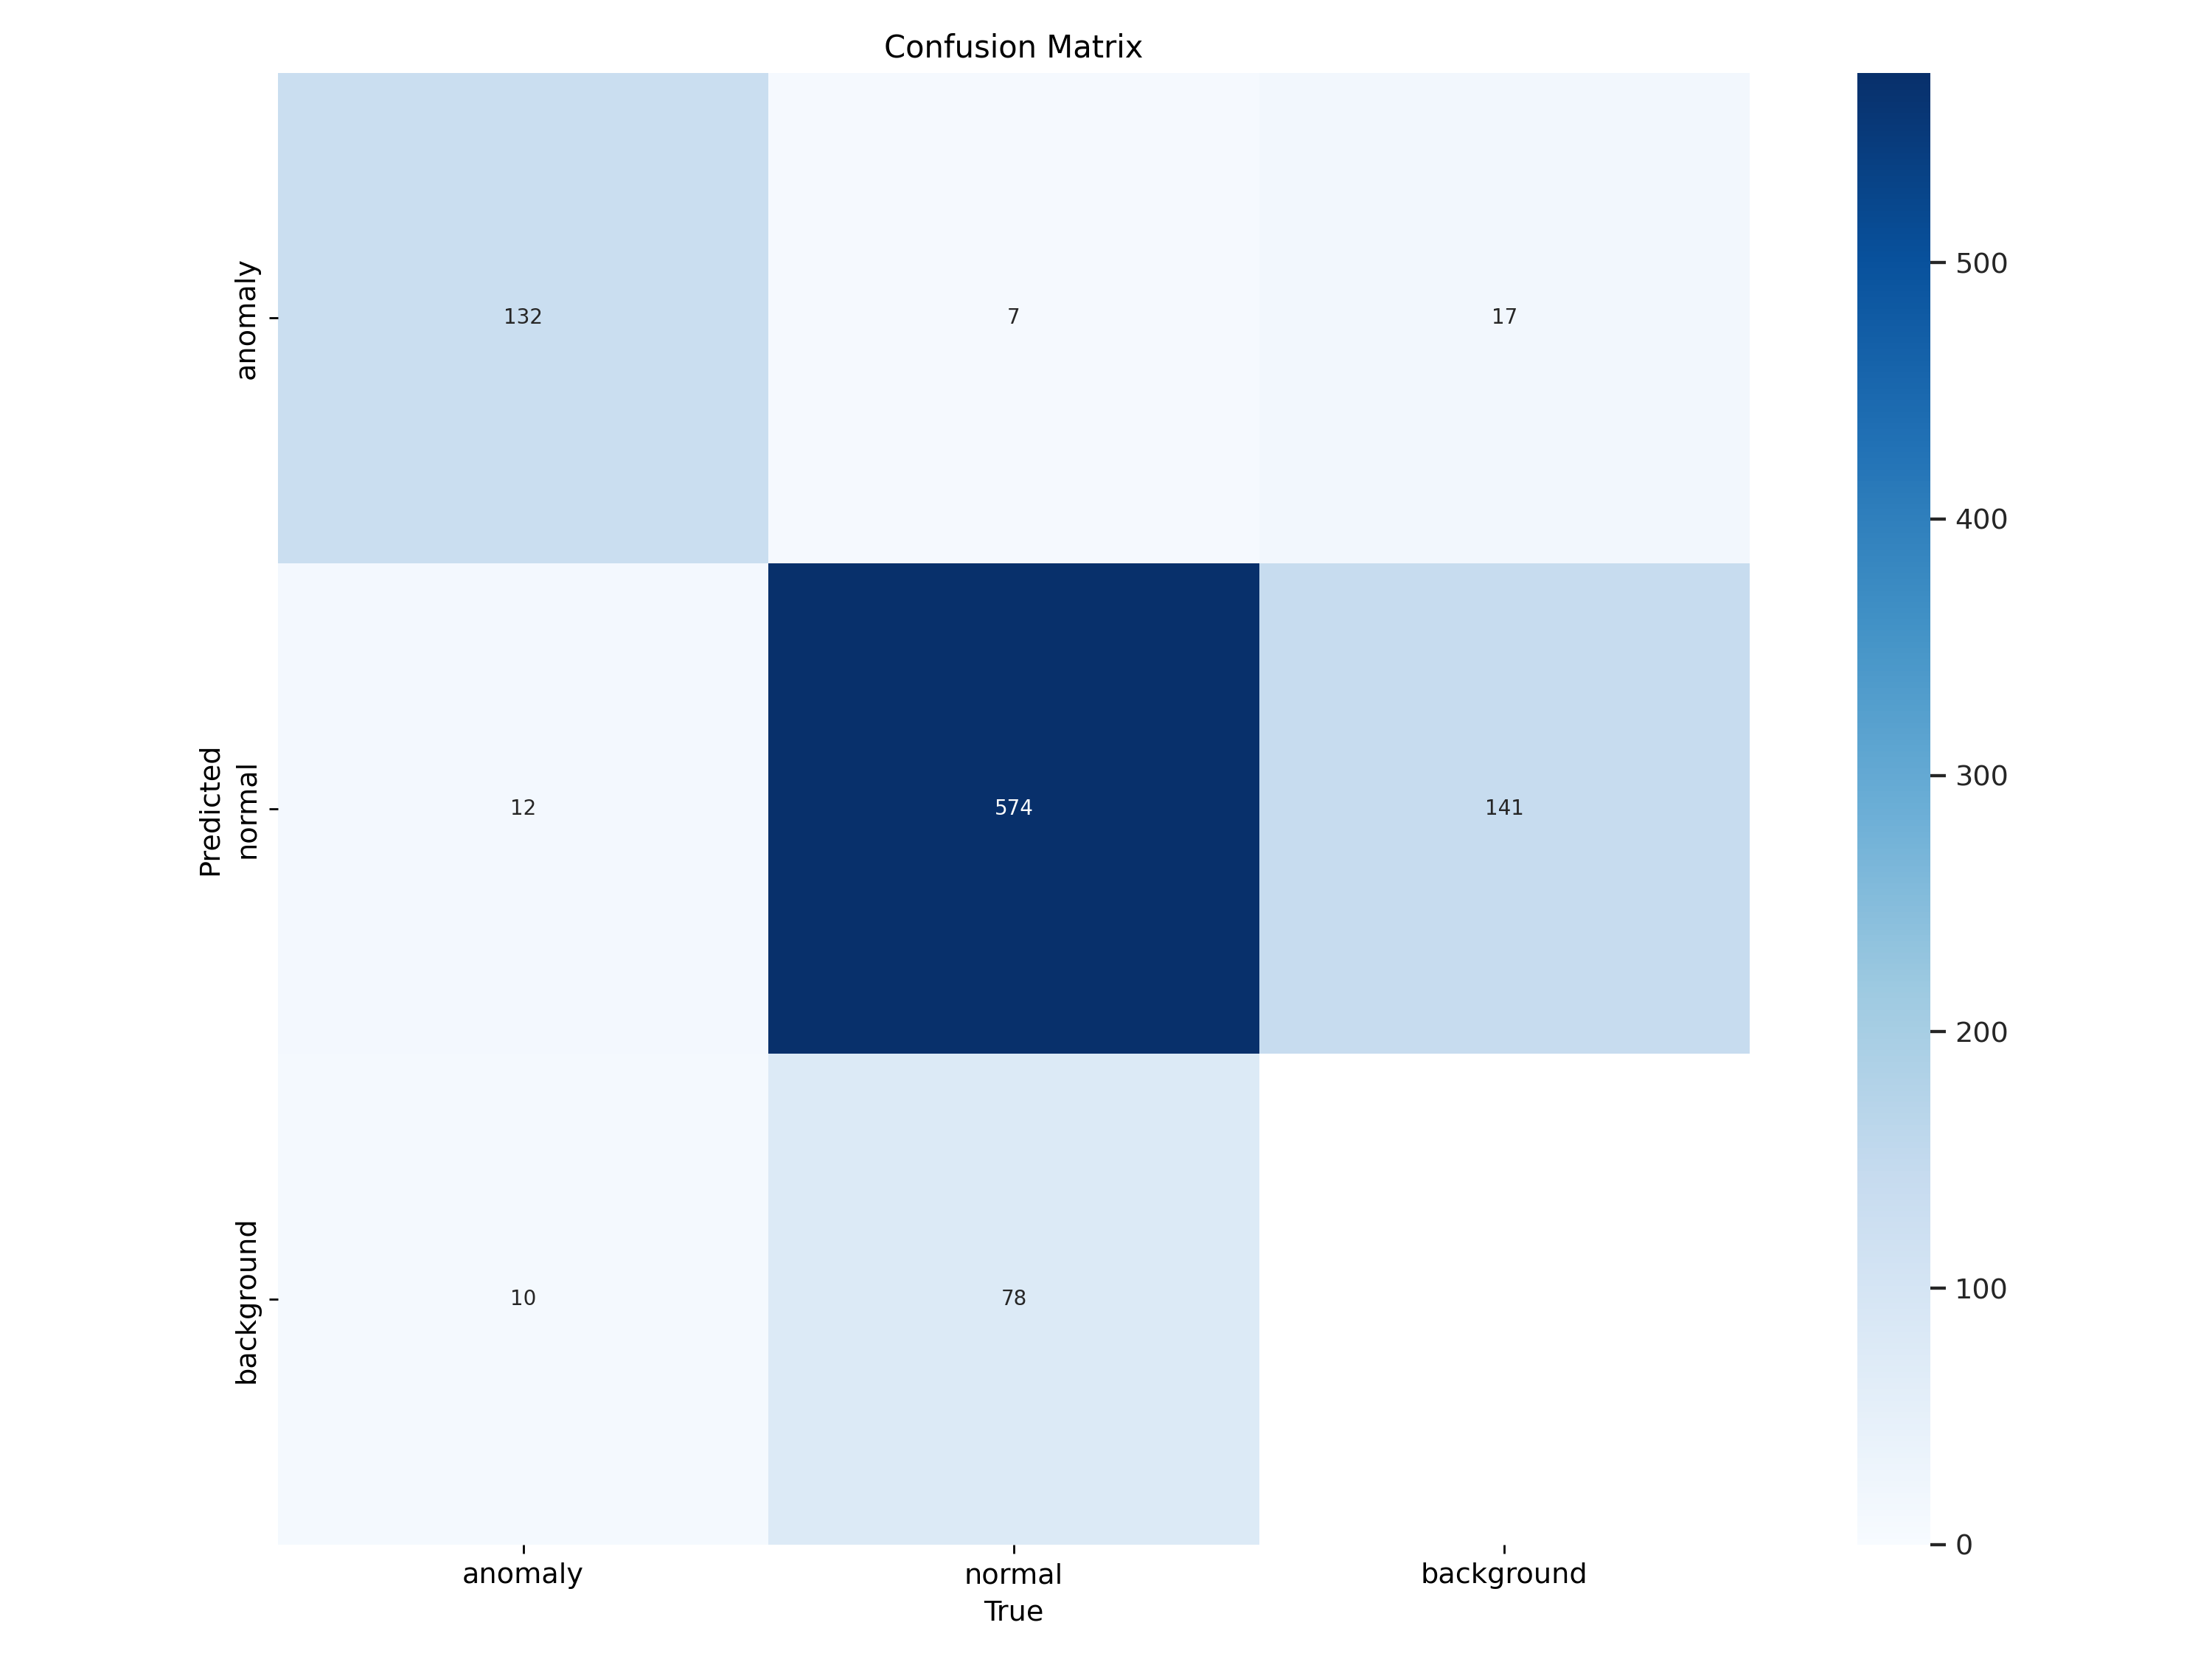

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


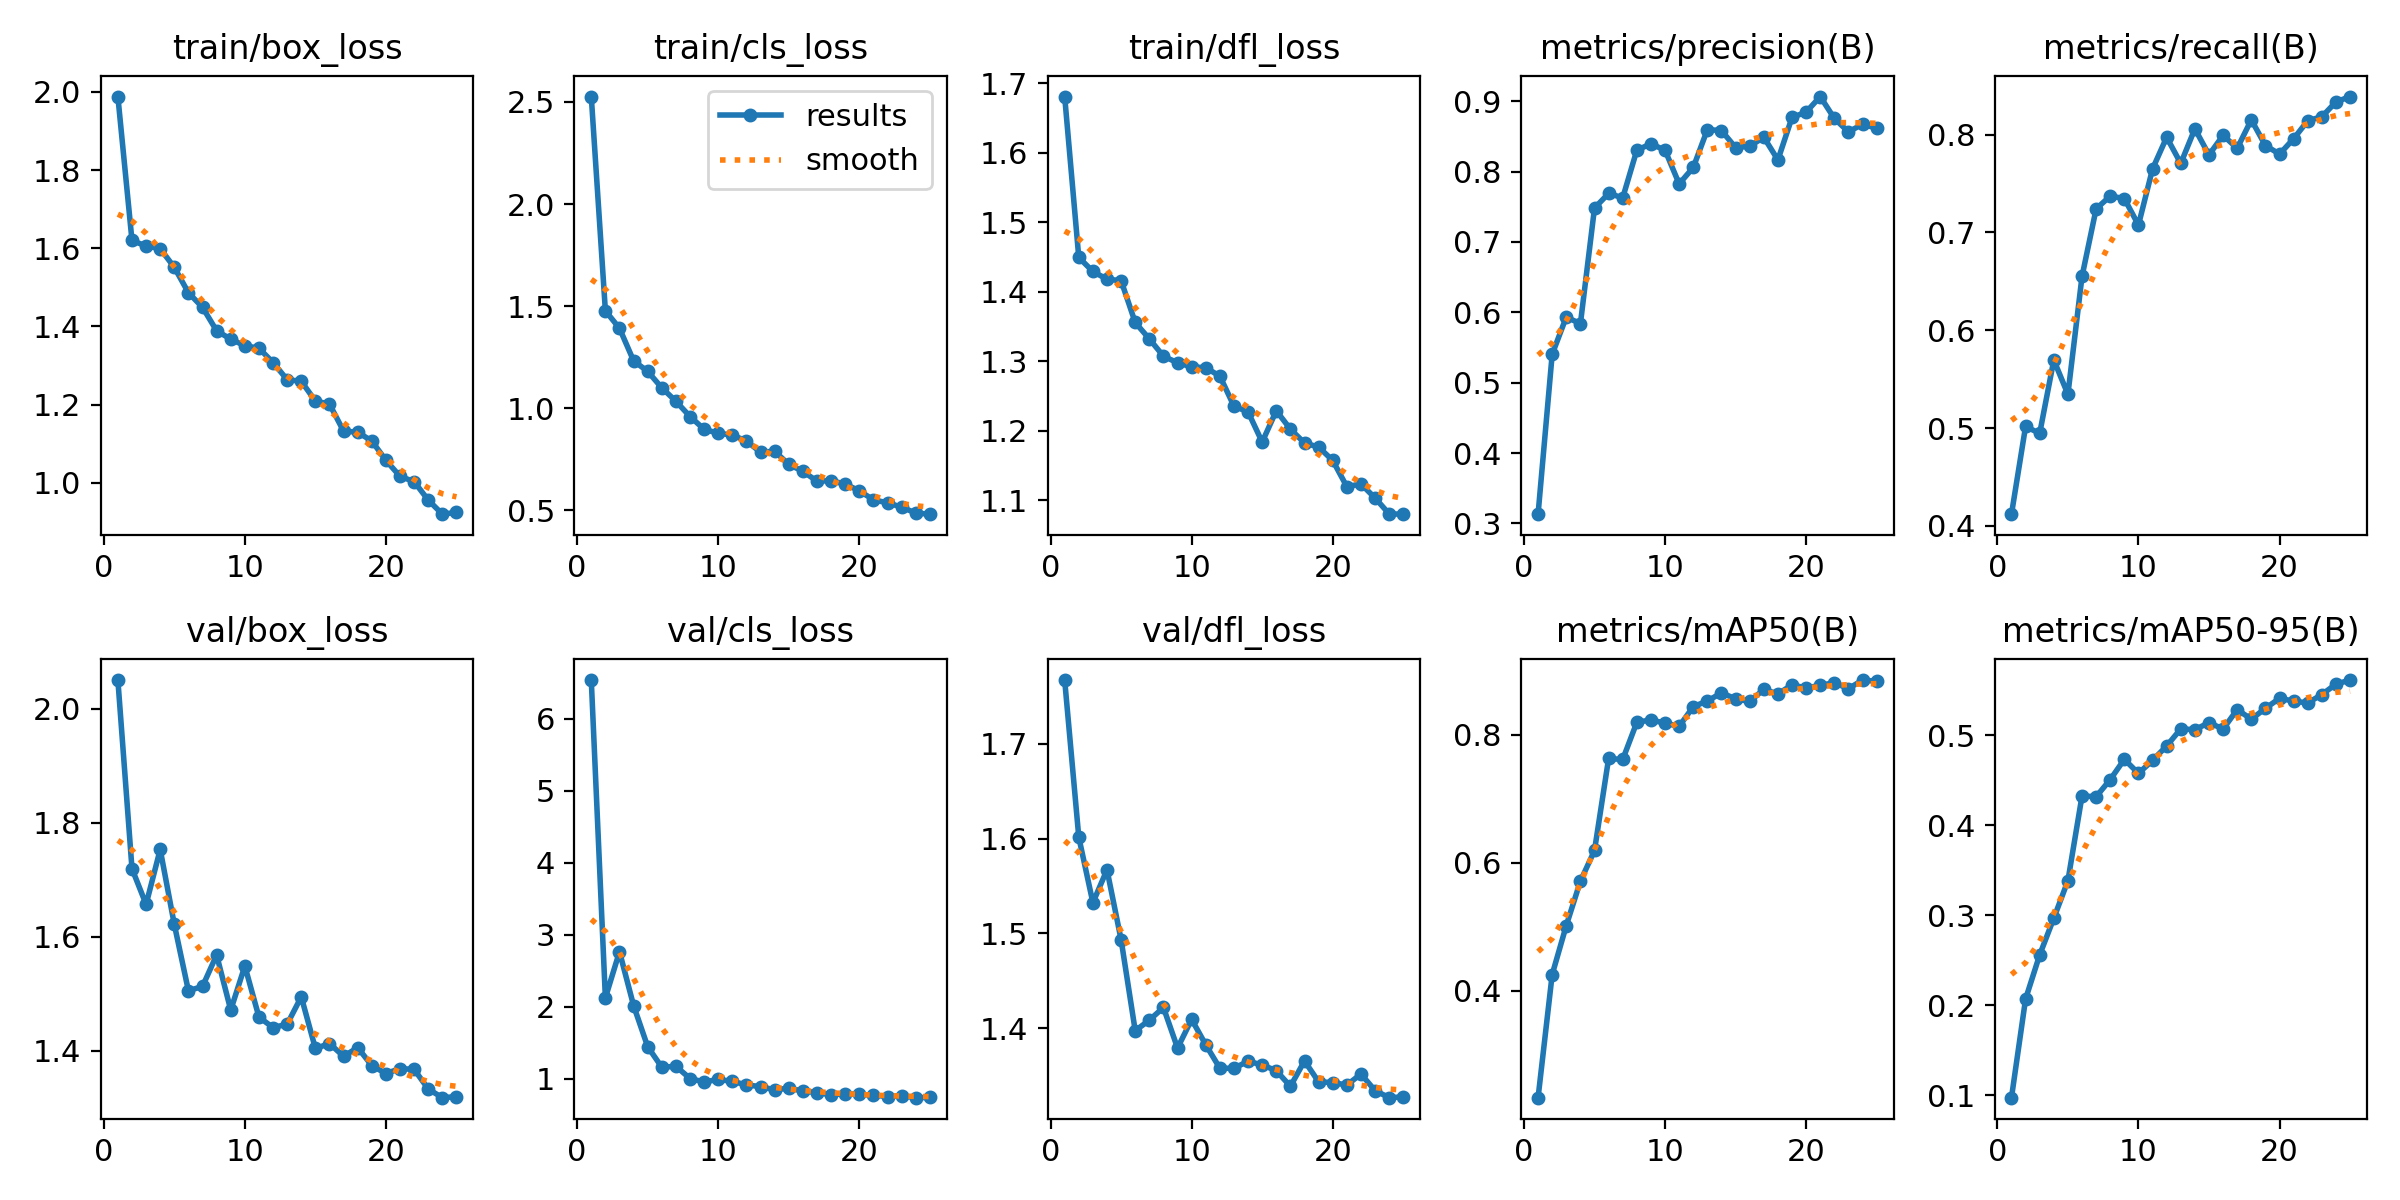

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


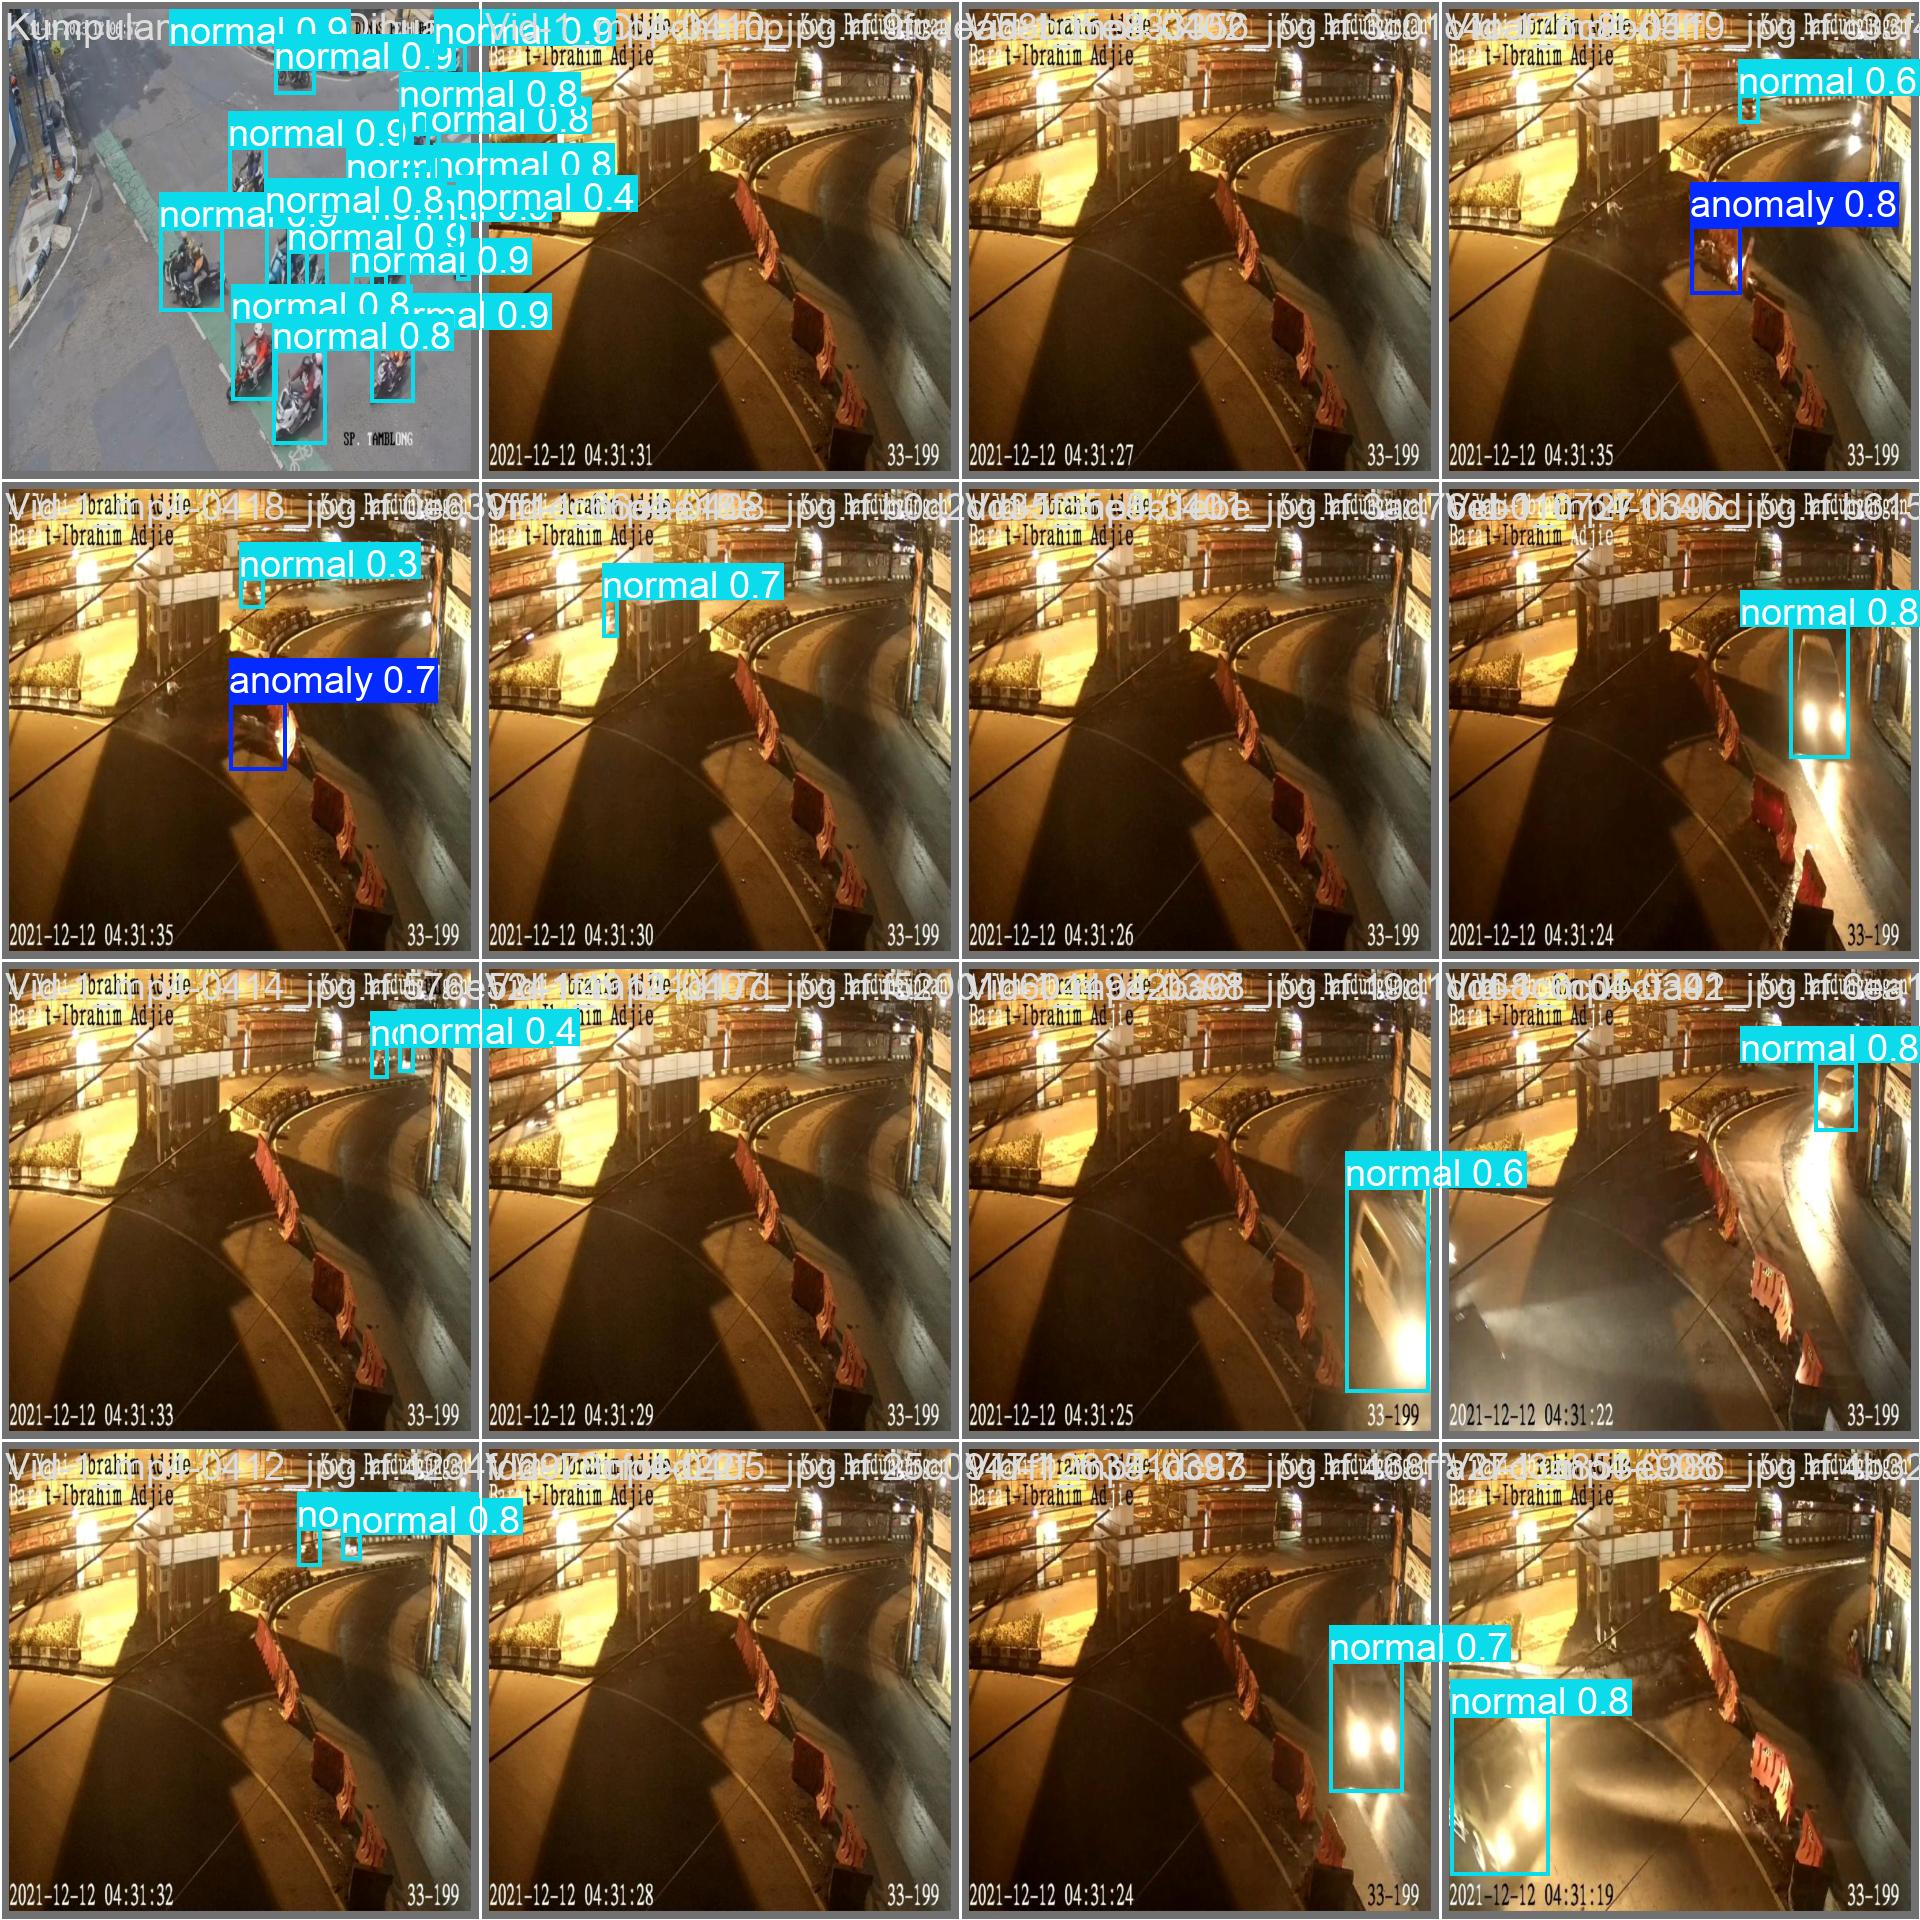

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/TA-9/valid/labels.cache... 114 images, 9 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:10<00:00,  1.34s/it]
                   all        114        813      0.861      0.839      0.883      0.561
               anomaly         74        154      0.896      0.851      0.889      0.567
                normal         90        659      0.827      0.827      0.878      0.555
Speed: 9.6ms preprocess, 20.1ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/18 /content/datasets/TA-9/test/images/Kumpulan-Laka-V2-Dibuat-dengan-Clipchamp_mp4-0007_jpg.rf.2b0ad52411da406e6e2f1dbbc1db0d0c.jpg: 800x800 5 anomalys, 15 normals, 22.5ms
image 2/18 /content/datasets/TA-9/test/images/Kumpulan-Laka-V2-Dibuat-dengan-Clipchamp_mp4-0048_jpg.rf.9ad321f51f6e02e10e61924f9d647f72.jpg: 800x800 2 anomalys, 22.5ms
image 3/18 /content/datasets/TA-9/test/images/Kumpulan-Laka-V2-Dibuat-dengan-Clipchamp_mp4-0067_jpg.rf.6f39d85a970fa7c15473a8a70d213b9a.jpg: 800x800 1 anomaly, 2 normals, 22.4ms
image 4/18 /content/datasets/TA-9/test/images/Vid-1_mp4-0022_jpg.rf.d6485e9a7d4abe203f29484e9fde0bfd.jpg: 800x800 10 normals, 22.4ms
image 5/18 /content/datasets/TA-9/test/images/Vid-1_mp4-0030_jpg.rf.6d007d6ff931b9e64ef903b8695d0f85.jpg: 800x800 10 normals, 22.4ms
image 6/18 /content/datasets

**NOTE:** Let's take a look at few results.

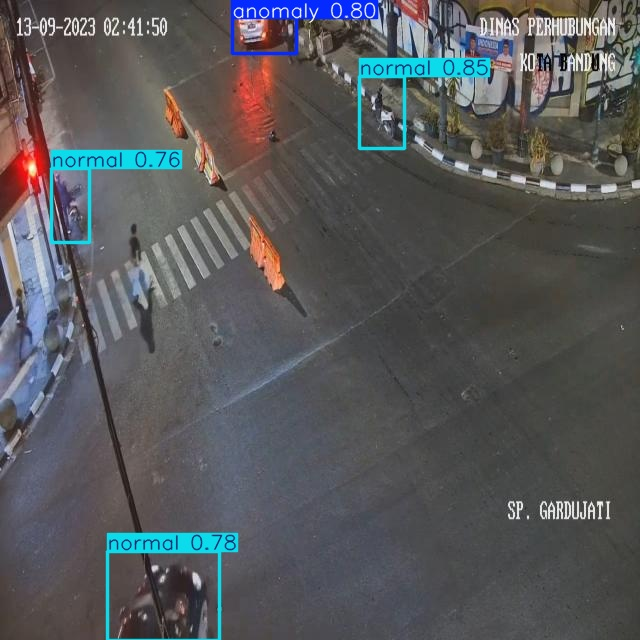

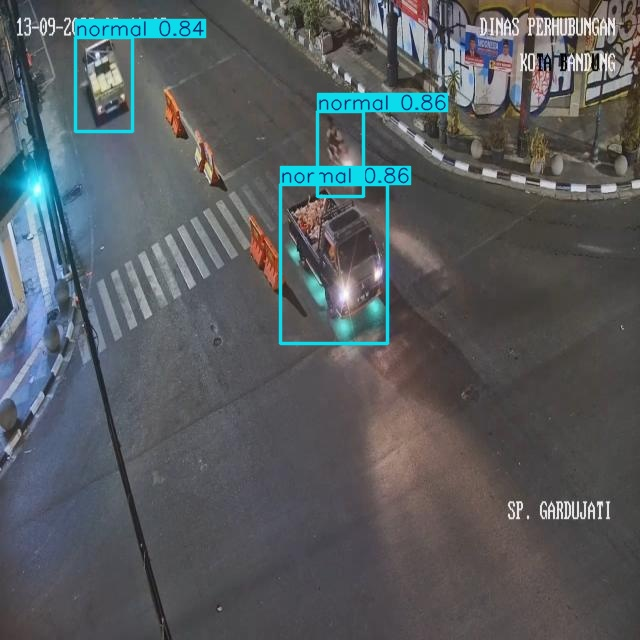

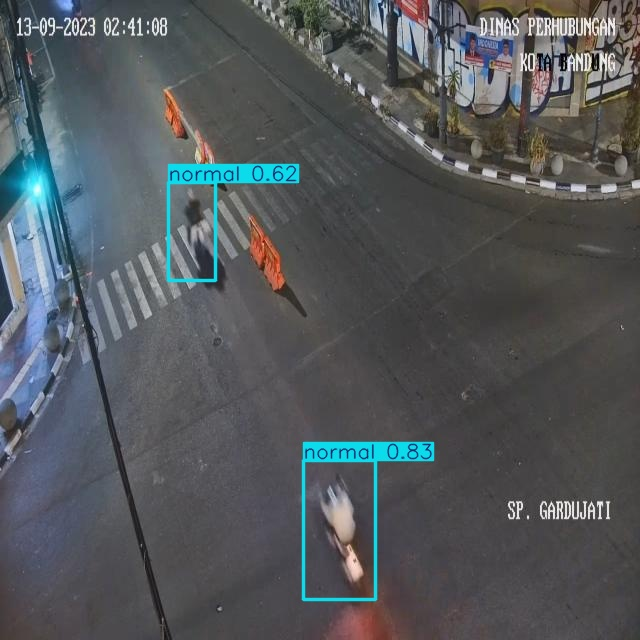

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [17]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

Dependency ultralytics==8.0.196 is required but found version=8.2.64, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/whop-qepf3/ta-vvzhl/9
Share your model with the world at: https://universe.roboflow.com/whop-qepf3/ta-vvzhl/model/9


In [22]:
from google.colab import files
import shutil
import zipfile
import os

# Path folder dan file yang akan di-zip
folder_path = 'runs'
file1_path = 'yolov8s.pt'
file2_path = 'yolov8n.pt'
zip_path = '/content/yolov8_and_runs.zip'

# Membuat zip dari folder 'runs'
shutil.make_archive('/content/yolov8_and_runs', 'zip', folder_path)

# Menambahkan file ke zip
with zipfile.ZipFile(zip_path, 'a') as zipf:
    if not os.path.exists('/content/yolov8s.pt'):
        shutil.copy(file1_path, '/content/')
    if not os.path.exists('/content/yolov8n.pt'):
        shutil.copy(file2_path, '/content/')
    zipf.write(file1_path)
    zipf.write(file2_path)

# Mengunduh file zip
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>